In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datafidelity as df
import spectral_analysis as sa

In [3]:
wave, flux =np.genfromtxt('../data/spectra/bsnip/sn2007bz-20070426.419-ui.flm', unpack=True)

In [4]:
#define redshift, mw reddening, deredshift spectrum
redshift = 0.022194
a_v = 0.092
wave_dered = wave/(1.+redshift)

In [5]:
#determine the optimal smoothing parameter (vexp) based on S/N
vexp, SNR = df.find_vexp(wave_dered, flux)
print ('vexp:', vexp, 'S/N', SNR)

vexp: 0.003109163685447457 S/N 33.297089931740565


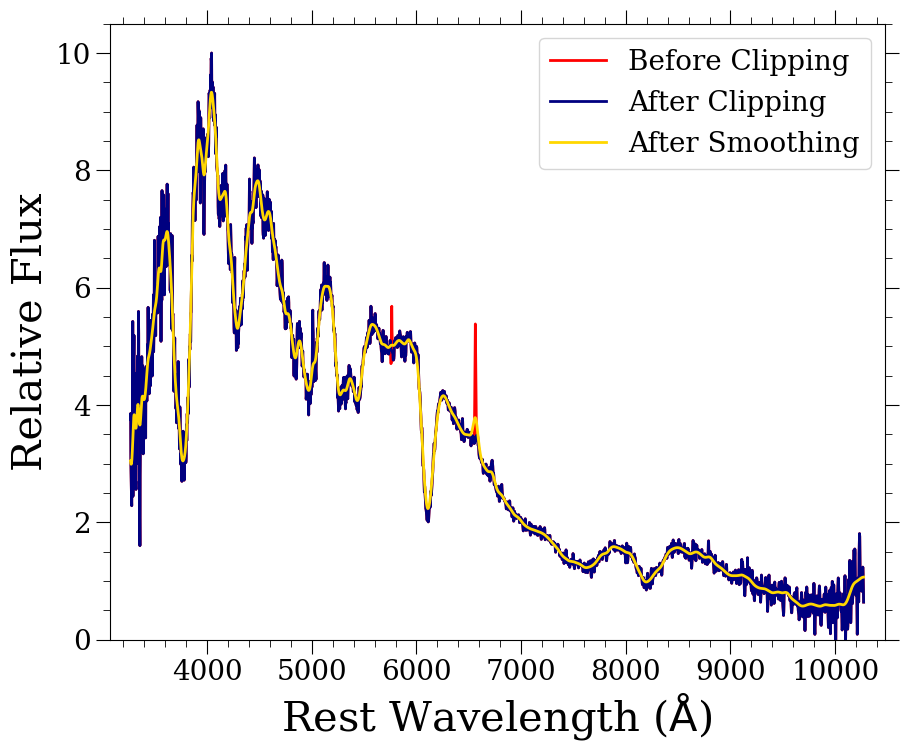

In [6]:
#clip artifacts and host galaxy emission lines
wave_clip, flux_clip, var_clip = df.clip(wave_dered, flux, None, vexp, testing=True, filename=None)

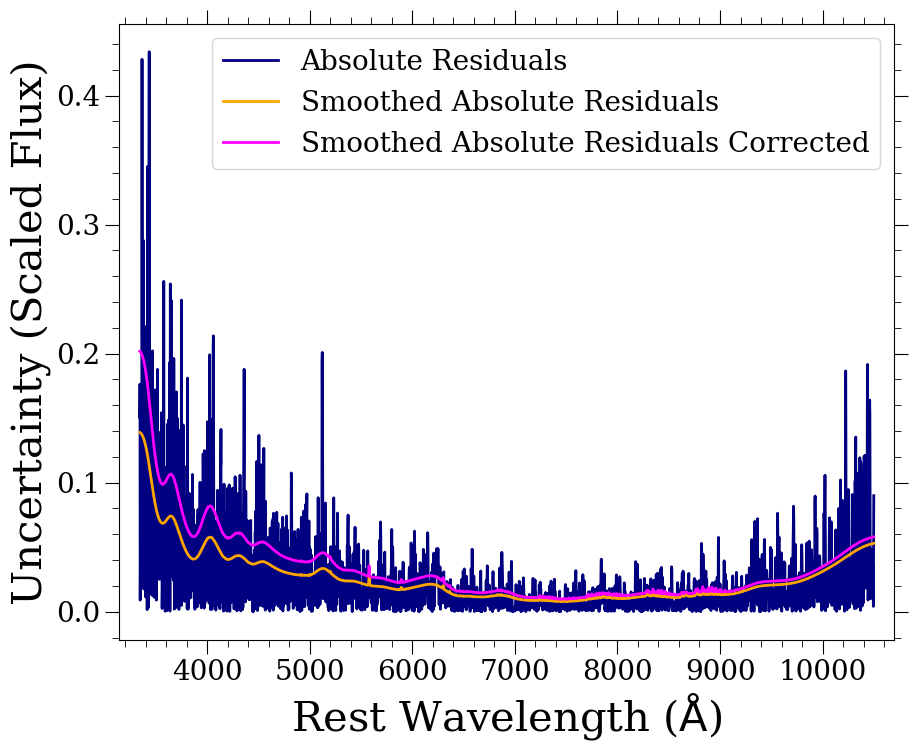

In [7]:
#generate variance spectrum
wave_clip = wave_clip*(1.+redshift) #reredshift for MW extinction correction
ivar, SNR = df.genivar(wave_clip, flux_clip, var_clip, vexp=vexp, testing=True, source='')
var = 1./ivar

In [8]:
#correct for MW extinction
dered_flux, dered_var = sa.deredden(a_v, 3.1, wave_clip, flux_clip, var, model = 'f99')

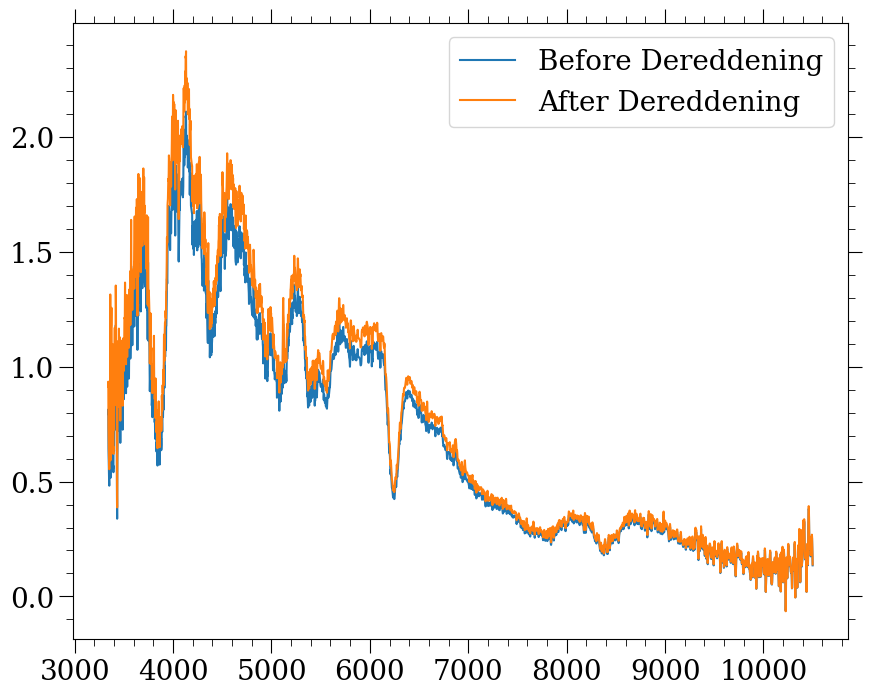

In [9]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 8, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 20)
# ax.xaxis.set_ticks(np.arange(np.round(wave[0],-3),np.round(wave[-1],-3),1000))
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.plot(wave_clip,flux_clip, label='Before Dereddening')
plt.plot(wave_clip,dered_flux, label='After Dereddening')
plt.legend(loc=1, fontsize=20)
plt.show()

In [11]:
#write to a new file
dered_err = np.sqrt(dered_var)
new_spec_data = np.transpose([wave_clip, dered_flux, dered_err])
np.savetxt('../../new_spec.flm', new_spec_data)